In [71]:
#Reading the csv file
import pandas as pd
insurance = pd.read_csv('datasets\insurance.csv')

print(insurance.keys())
print(insurance.info())


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


In [52]:
#fucntions to convert smoker feature to (0,1)
def is_smoker(string):
    if string.lower() == "yes":
        return 1
    if string.lower() == "no":
        return 0
    
#fucntions to convert region feature into numerical
def region_numerical(string):
    if string.lower() == "southwest":
        return 1
    if string.lower() == "southeast":
        return 2
    if string.lower() == "northwest":
        return 3
    if string.lower() == "northeast":
        return 4
    else:
        return -1
    

In [57]:
insurance_copy = insurance.copy()
print(insurance_copy.head(3))

#Creats a new feature "isSmoker" and replaces "yes" and "no" with 0 and 1
insurance_copy['isSmoker'] = list(map(is_smoker, insurance_copy['smoker']))
insurance_copy['region_num'] = list(map(region_numerical, insurance_copy['region']))
print(insurance_copy.head(3))

#analyzing the correlation between the features
corr = insurance_copy.corr()
print(corr.to_string())

   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620
   age     sex    bmi    ...         charges isSmoker region_num
0   19  female  27.90    ...      16884.9240        1          1
1   18    male  33.77    ...       1725.5523        0          2
2   28    male  33.00    ...       4449.4620        0          2

[3 rows x 9 columns]
                 age       bmi  children   charges  isSmoker  region_num
age         1.000000  0.109272  0.042469  0.299008 -0.025019   -0.002127
bmi         0.109272  1.000000  0.012759  0.198341  0.003750   -0.157566
children    0.042469  0.012759  1.000000  0.067998  0.007673   -0.016569
charges     0.299008  0.198341  0.067998  1.000000  0.787251    0.006208
isSmoker   -0.025019  0.003750  0.007673  0.787251  1.000000    0.002181
region_num -0.002127 -0.157566 -

Text(0, 0.5, 'Charges')

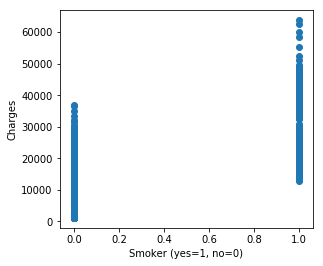

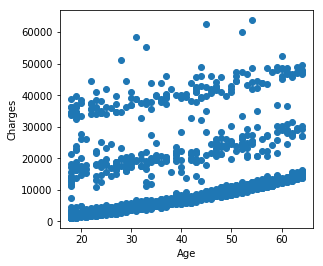

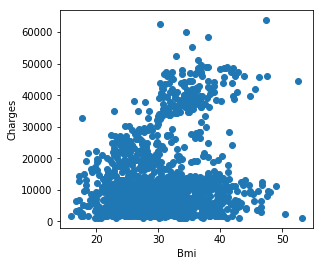

In [59]:

#analyzing the relationship between features by graphing
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,4))
ax = figure.add_subplot(121)
ax.scatter(insurance_copy["isSmoker"], insurance_copy["charges"])
ax.set_xlabel("Smoker (yes=1, no=0)")
ax.set_ylabel("Charges")


figure2 = plt.figure(figsize=(10,4))
ax2 = figure2.add_subplot(122)
ax2.scatter(insurance_copy["age"], insurance_copy["charges"])
ax2.set_xlabel("Age")
ax2.set_ylabel("Charges")


figure3 = plt.figure(figsize=(10,4))
ax3 = figure3.add_subplot(121)
ax3.scatter(insurance_copy["bmi"], insurance_copy["charges"])
ax3.set_xlabel("Bmi")
ax3.set_ylabel("Charges")


## Interesting discoveries
After analyzing the dataset, It looks like there is strong correlation between isSmoke and charges, which is .787, a strong positive correlation. There is also correlation between age and the charges, which is .299, a weak positive correlation.

## Prediction
I would like to predict insurance charges for a customer.

## Data cleaning & data splitting

There are no missing values and all the features seem important for the prediction. So, I would not be needing any cleaning here. However, Smoker and region seem imporant feature. They are object in the dataset, so I alreaday converted them to numerical. 

In [74]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(insurance_copy, test_size=0.25, random_state=123)
print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())

train_set.to_csv (r'datasets\train_set.csv', index = None, header=True)
test_set.to_csv (r'datasets\test_set.csv', index = None, header=True)


1003 335
      age     sex    bmi    ...         charges isSmoker region_num
417    36  female  22.60    ...      18608.2620        1          1
600    18  female  39.16    ...       1633.0444        0          2
280    40  female  28.12    ...      22331.5668        1          4
1276   22  female  30.40    ...       2741.9480        0          4
603    64  female  39.05    ...      16085.1275        0          2

[5 rows x 9 columns]
     age     sex     bmi    ...          charges isSmoker region_num
650   49  female  42.680    ...       9800.88820        0          2
319   32    male  37.335    ...       4667.60765        0          4
314   27  female  31.400    ...      34838.87300        1          1
150   35    male  24.130    ...       5125.21570        0          3
336   60    male  25.740    ...      12142.57860        0          2

[5 rows x 9 columns]
